# Problem Statement and Dataset Description

## Background

Amidst the increasingly competitive modern retail landscape, understanding customer behavior is key to formulating effective business strategies. The dataset customer_shopping_data.csv contains customer transaction records from various shopping centers, complete with important attributes such as product category, payment method, age, and gender.

By analyzing this data, retail companies can understand customer spending patterns, identify the most popular products, see trends based on age and gender, and assess how effective specific shopping centers are at increasing sales. Deeply utilizing this data allows companies to design more targeted marketing strategies, manage inventory more efficiently, and improve the overall customer experience.

Here I am taking data from customer_shopping_data with a time range from 2021 to 2023, which will be used for data analysis.

## Smart & Problem Statement

### SMART

1. Specific 

Analyze customer transaction data from various shopping centers to identify purchasing patterns based on product category, customer demographics (age and gender), and payment method in order to determine the best-selling categories and shopping centers with the highest sales activity.

2. Measurable 

The success of the analysis is measured by identifying the top product categories based on sales volume and total revenue, as well as the customer segmentation that transacts most frequently at each shopping center.

3. Achievable 

Provides readers with data to understand the categories most frequently purchased by consumers in shopping malls.

4. Relevant 

It is hoped that with this data, sellers can understand the appropriate categories and locations to sell their products.

5. Time-Bound 

The results of this analysis are expected to be used for business decision-making in the next quarter.


### Problem Statement

This analysis aims to gain deep insights into customer spending patterns across various shopping malls, considering product categories, age, gender, and payment methods. Its success is measured by the analysis's ability to identify the most popular products and key customer segments, in terms of sales volume and total revenue.

This analysis is based on complete and structured data, enabling it to provide a clear and accurate picture of the products most frequently purchased by consumers. The results of this analysis are expected to serve as a reference for business owners in designing more targeted marketing and distribution strategies, while also supporting more effective business decision-making in the next quarter.


## Problem Elaboration

1. What 
- What is the best-selling product category?

2. Why 
- Why is it important to analyze customer demographics, sales locations, and product categories before developing a business strategy?

3. Who 
- Who are the parties who need this analysis?
- Who are the main customers based on age and gender?

4. Where 
- Where is this sales performance issue occurring? - Which shopping mall has the highest sales?

5. When 
- When is the right time to analyze so that the results can be used for business decision-making?

6. How 
- How can customer transaction data be processed and analyzed to identify spending patterns and support business decision-making?


## Target Audience

It is hoped that this data can assist users who need to make decisions, such as business owners, marketing teams, and partners who wish to sell a product within a shopping mall.

# Data Loading

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import f_oneway

np.random.seed(10)

In [ ]:
df = pd.read_csv('dataset.csv')
df.reset_index(drop=True, inplace=True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
print('Pengecekan Tipe Data')
df.info()
print('')
print('Pengecekan Data NaN')
df.isna().sum()

Pengecekan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB

Pengecekan Data NaN


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
for col in df.columns:
    unique_count = df[col].nunique()
    total_count = len(df)
    print(f"{col}: {unique_count} unique values, ratio: {unique_count / total_count:.2f}")

invoice_no: 99457 unique values, ratio: 1.00
customer_id: 99457 unique values, ratio: 1.00
gender: 2 unique values, ratio: 0.00
age: 52 unique values, ratio: 0.00
category: 8 unique values, ratio: 0.00
quantity: 5 unique values, ratio: 0.00
price: 40 unique values, ratio: 0.00
payment_method: 3 unique values, ratio: 0.00
invoice_date: 797 unique values, ratio: 0.01
shopping_mall: 10 unique values, ratio: 0.00


# Data Cleaning 

In [6]:
df = df.replace(' ', '')
df = df.replace(',', '')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


# Exploration and Analysis

In [ ]:
df_category_count = (
    df.groupby('category', as_index=False)
    .size()
    .rename(columns={'size':'count'})
    .sort_values(by='count', ascending=False)
)
print('total transaksi per kategori')
df_category_count

total transaksi per kategori


,category,count
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


In [ ]:
df_qty = (
    df.groupby('category', as_index=False)
      .agg({'quantity': 'sum'})
      .sort_values(by='quantity', ascending=False)
)

print('total barang terjual per kategori')
df_qty

total barang terjual per kategori


,category,quantity
1,Clothing,103558
2,Cosmetics,45465
3,Food & Beverage,44277
7,Toys,30321
4,Shoes,30217
6,Technology,15021
0,Books,14982
5,Souvenir,14871


In [ ]:
df['total'] = df['quantity'] * df['price']
result =( df.groupby('category', as_index=False)
    .agg({"total": "sum"}).\
    sort_values(by=['total'], ascending=False)
)

print("total revenue per kategori")
result

total revenue per kategori


,category,total
1,Clothing,1.139968e+08
4,Shoes,6.655345e+07
6,Technology,5.786235e+07
2,Cosmetics,6.792863e+06
7,Toys,3.980426e+06
3,Food & Beverage,8.495351e+05
0,Books,8.345529e+05
5,Souvenir,6.358247e+05


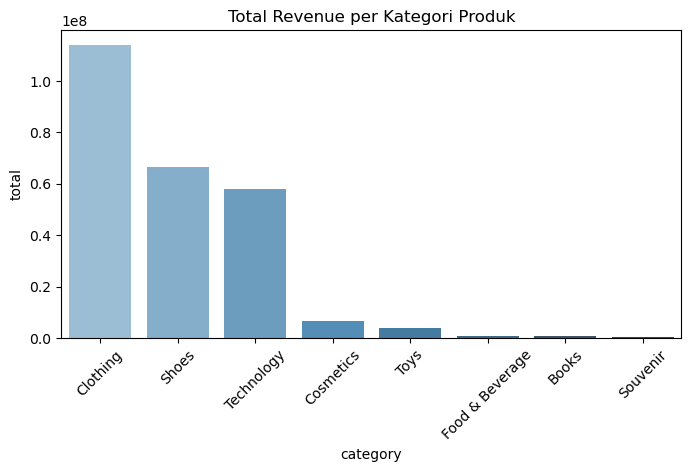

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(data=result, 
            x='category', 
            y='total',
            hue='category',
            palette='Blues_d',
            legend=False
)

plt.title('Total Revenue per Kategori Produk')
plt.xticks(rotation=45)
plt.show()

From the data above, it can be concluded that the clothing category is the most profitable compared to the others. With this approach, we can determine which category is most frequently purchased by consumers, as well as know the total number of items sold, total profit, and total transactions per category.

In [76]:
mall = df.groupby(['shopping_mall'], as_index=False)['total'].sum().sort_values(by='total', ascending=False)

print('mall paling laris')
mall

mall paling laris


,shopping_mall,total
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


It turns out there are 2 shopping malls with the highest total purchases, namely Mall of Istanbul and Kanyon. From this, we can conclude that many customers frequently shop at these malls.

In [15]:
gender_count = df['gender'].value_counts()
gender_count

gender
Female    59482
Male      39975
Name: count, dtype: int64

<Axes: title={'center': 'Distribusi Gender'}, ylabel='count'>

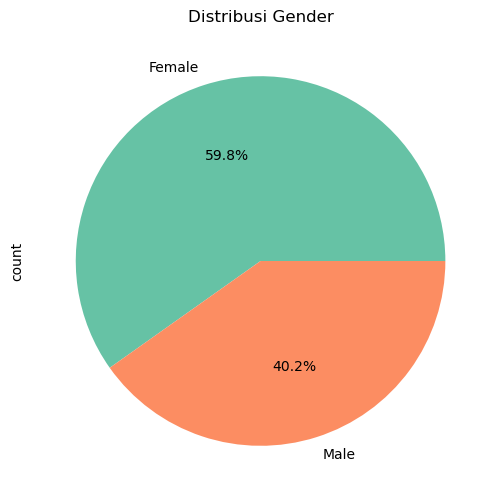

In [ ]:
# Pie chart
gender_count.plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    colors=['#66c2a5', '#fc8d62'],
    title='Distribusi Gender'
)

In [17]:
demo_gender = df.groupby(['gender'], as_index=False)['total'].sum()

print('Total pembelian berdasarkan demografi gender pelanggan')
demo_gender

Total pembelian berdasarkan demografi gender pelanggan


,gender,total
0,Female,1.502071e+08
1,Male,1.012987e+08


In [18]:
df_gender_age = pd.crosstab(
    index=df['age'],
    columns=df['gender']
)

df_total_belanja = df.groupby('age', as_index=False)['total'].sum()

df_combined = df_gender_age.merge(
    df_total_belanja,
    on='age'
).rename(columns={'total': 'total_belanja'})

df_combined = df_combined.sort_values(by='total_belanja', ascending=False)
df_combined.head(10)

,age,Female,Male,total_belanja
19,37,1280,777,5578539.57
46,64,1193,809,5272475.10
33,51,1202,791,5238724.74
4,22,1208,843,5208841.41
9,27,1160,790,5171859.06
21,39,1163,784,5135672.77
30,48,1141,814,5131747.86
26,44,1186,718,5131686.80
6,24,1155,822,5082409.90
25,43,1157,843,5050323.72


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

grouped = df.groupby(['gender', 'age_group'], as_index=False, observed=True)['total'].sum()
grouped


,gender,age_group,total
0,Female,<20,8129996.53
1,Female,20-29,29909207.36
2,Female,30-39,29094702.32
3,Female,40-49,28650144.60
4,Female,50-59,28588485.71
5,Female,60+,25834599.50
6,Male,<20,5528886.21
7,Male,20-29,19479312.01
8,Male,30-39,19275711.00
9,Male,40-49,20129701.98


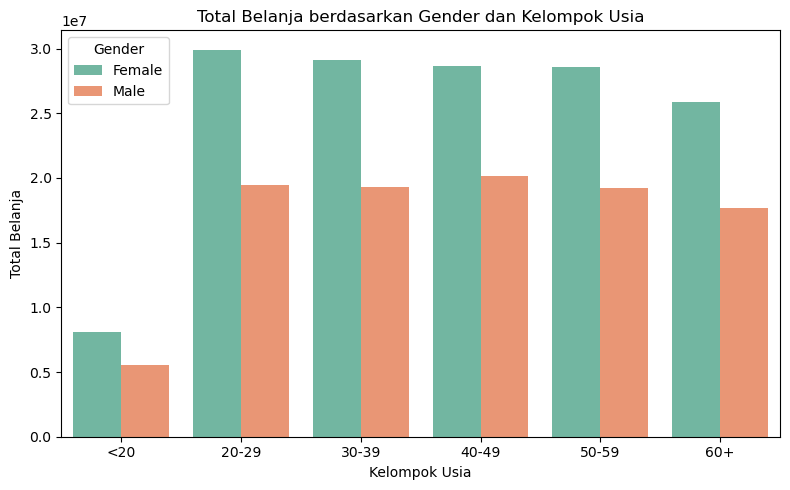

In [ ]:
# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='age_group', y='total', hue='gender', palette='Set2')

plt.title('Total Belanja berdasarkan Gender dan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Total Belanja')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Based on the data we have obtained, we know that female consumers are the dominant demographic, and that consumers aged 37 are the dominant purchasers. However, when we group by age, we can see that the 20-29 age group dominates purchases. This could be caused by several factors, which is why I decided to try statistical calculations using ANOVA. In this statistical calculation, I want to determine if there are differences in total spending between age groups. With this approach, we will be clearer in determining the appropriate business strategy for selling a product.

In [ ]:
grouped_data = [df[df['age_group'] == group]['total'] for group in df['age_group'].unique()]

f_stat, p_value = f_oneway(*grouped_data)

print(f'F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}')


F-Statistic: 0.9660, P-Value: 0.4370


If p-value < 0.05 = There is a significant difference between at least 2 age groups in terms of total spending.

If p-value ≥ 0.05 = No statistically significant difference.

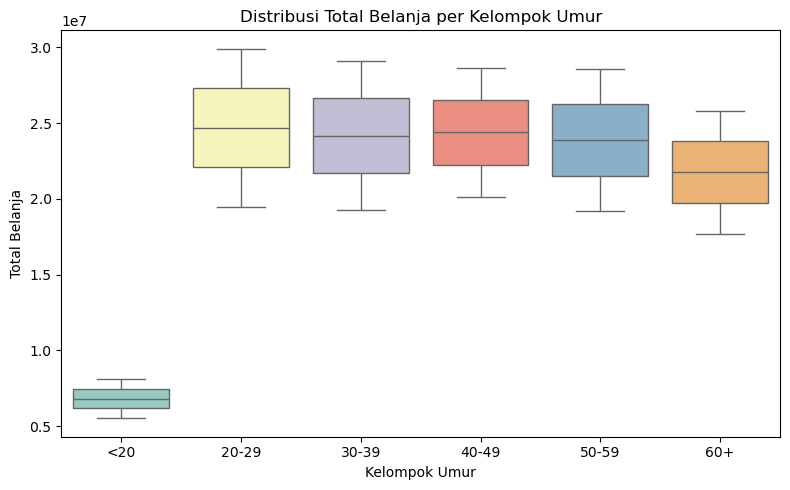

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=grouped,
    x='age_group',
    y='total',
    hue='age_group',
    palette='Set3',
    legend=False
)

plt.title('Distribusi Total Belanja per Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Belanja')
plt.tight_layout()
plt.show()


In [23]:
male_total = df[df['gender'] == 'Male']['total']
female_total = df[df['gender'] == 'Female']['total']

t_stat, p_val = ttest_ind(male_total, female_total, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 0.32227222811581524, P-value: 0.7472472549714918


If p-value < 0.05 = There is a significant difference between genders in terms of total spending.

If p-value ≥ 0.05 = No statistically significant difference.

Based on the data generated, we can draw several conclusions: 
* The majority of consumers are female, accounting for 59.8%, and this is also true for total spending. 
* Total spending by age group is dominated by the 20-29 age group. 
* There is no statistically significant difference in age groups based on total spending. 
* There is no statistically significant difference in gender differences based on total spending.

<Axes: title={'center': 'Metode Pembayaran'}, ylabel='count'>

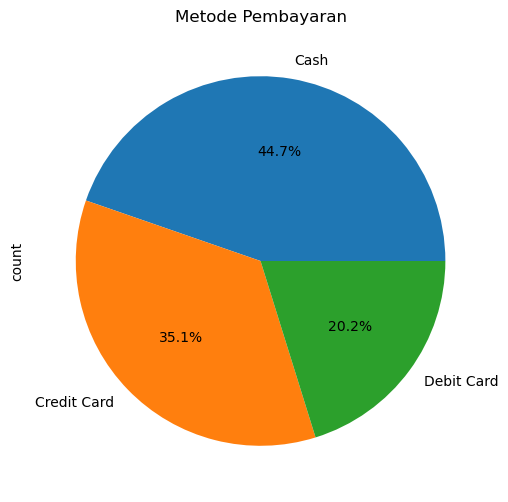

In [24]:
df['payment_method'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Metode Pembayaran'
)

Based on the data, consumers prefer to pay in cash, followed by credit card usage, and finally debit card. This can be a consideration for business owners in the future to install EDC machines to improve payment convenience.

In [25]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df['quarter'] = df['invoice_date'].dt.quarter

df.groupby(['year', 'month'], as_index=False)['total'].sum().sort_values(by=['year', 'month'])
df.groupby(['year', 'quarter'], as_index=False)['total'].sum()

,year,quarter,total
0,2021,1,27869289.22
1,2021,2,28447569.86
2,2021,3,29129941.00
3,2021,4,29113770.51
4,2022,1,28095108.22
5,2022,2,28921222.52
6,2022,3,29326937.83
7,2022,4,29093545.51
8,2023,1,21508409.58


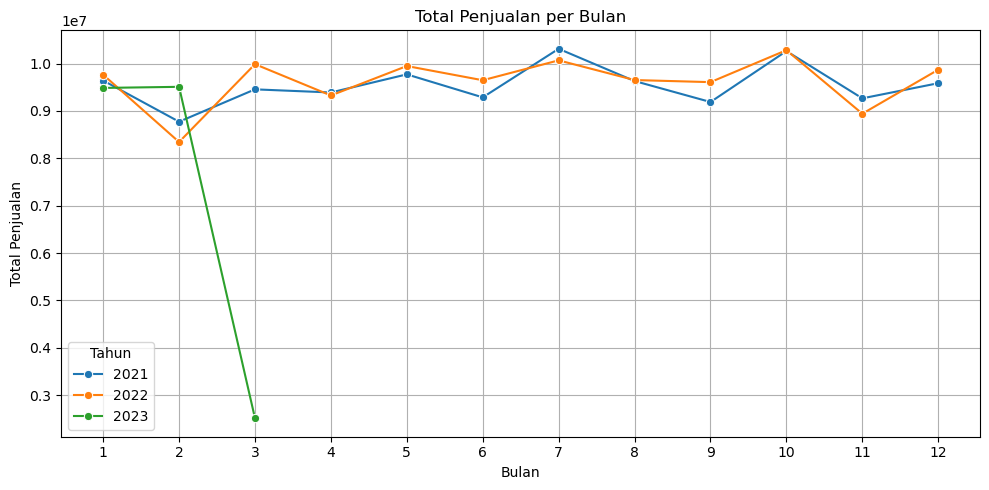

In [ ]:
# Grouping
monthly_sales = df.groupby(['year', 'month'], as_index=False)['total'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='total', hue='year', marker='o', palette='tab10')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(1, 13))
plt.legend(title='Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()


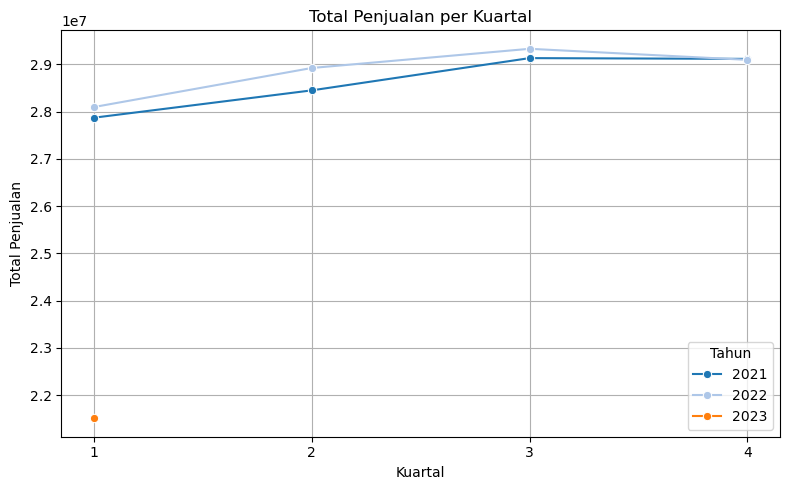

In [ ]:
# Grouping total kuartile
quarterly_sales = df.groupby(['year', 'quarter'], as_index=False)['total'].sum()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=quarterly_sales, x='quarter', y='total', hue='year', marker='o', palette='tab20')
plt.title('Total Penjualan per Kuartal')
plt.xlabel('Kuartal')
plt.ylabel('Total Penjualan')
plt.xticks([1, 2, 3, 4])
plt.legend(title='Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()

We finally have a sales overview with a monthly and quarterly time range. If you look closely, sales fluctuate each month, with an increase in sales one month followed by a decrease the next, and so on. However, when we look at the quartile data, we can see that there is an increase in sales in each quarter. This means that overall sales increased, even tho there were decreases in the following month for each increase.

After seeing the increase in sales, I decided to create filters for each category. Here, I want to determine which categories are experiencing an increase in total sales.

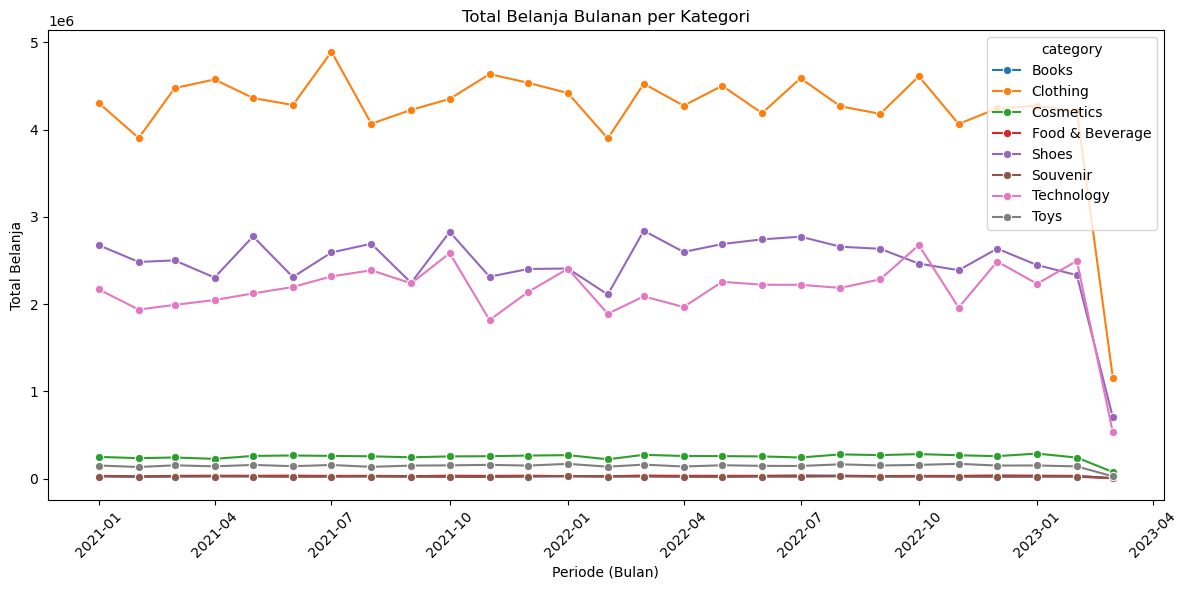

In [ ]:
monthly = df.groupby(['year', 'month', 'category'], as_index=False)['total'].sum()

monthly['period'] = pd.to_datetime(monthly[['year', 'month']].assign(day=1))

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='period', y='total', hue='category', marker='o')
plt.title('Total Belanja Bulanan per Kategori')
plt.xlabel('Periode (Bulan)')
plt.ylabel('Total Belanja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


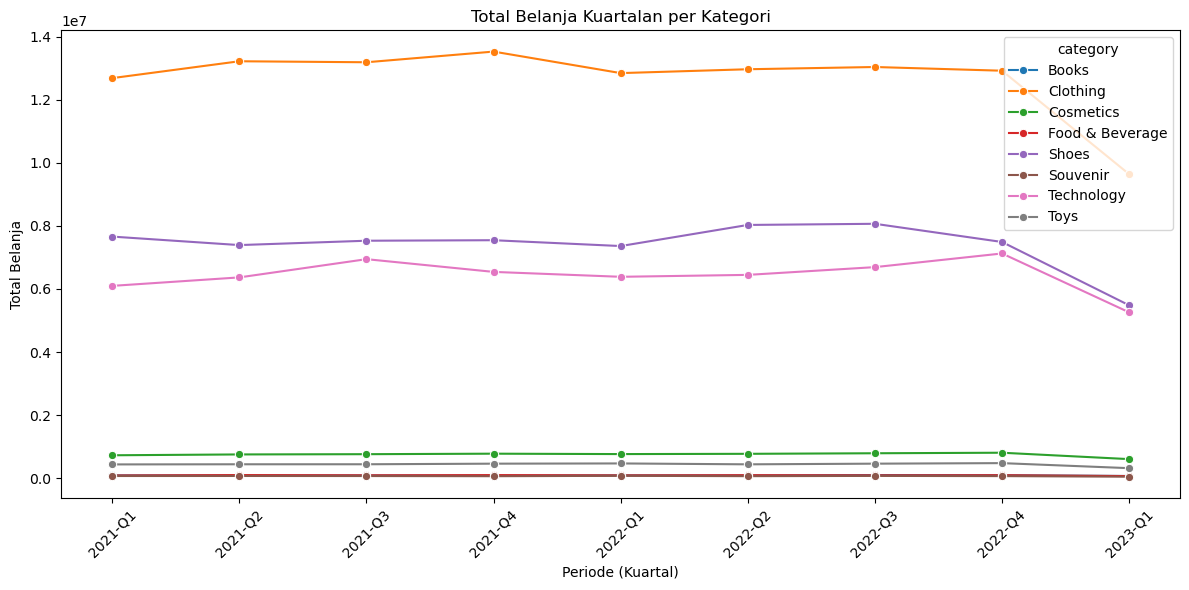

In [ ]:
quarterly = df.groupby(['year', 'quarter', 'category'], as_index=False)['total'].sum()

quarterly['period'] = quarterly['year'].astype(str) + '-Q' + quarterly['quarter'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly, x='period', y='total', hue='category', marker='o')
plt.title('Total Belanja Kuartalan per Kategori')
plt.xlabel('Periode (Kuartal)')
plt.ylabel('Total Belanja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In the data, we can see that in the monthly data, there are 3 categories that are highly fluctuating: clothing, shoes, and technology. The rest did not experience significant increases or decreases. From this, it can be concluded that most consumers shopping at shopping malls primarily purchase the top 3 categories.

# Conclusion

Based on the processed data, here are some key takeaways: 
* The top 3 categories with the highest total revenue are clothing, shoes, and technology. 
* The highest number of consumers are in the 20-29 age group, with females dominating. 
* In the quartile data, total sales increased, but when we look at the monthly data, there's a pattern where after an increase, there's a decrease the following month, although the decrease isn't very significant. 
* There are only 3 categories that are highly volatile: clothing, shoes, and technology. 
* There is no significant relationship between gender and total spending, nor is there a significant relationship between age group and total spending. 
* Most consumers prefer to pay with cash.

This analysis is created to provide an overview for business owners, as well as those who are about to start a business, so they can adjust to consumer demand. Overall, the product categories most in demand by consumers are clothing, cosmetics, and food & beverage. However, when measured by total revenue, the categories that come out on top are clothing, shoes, and technology. The results of this analysis are expected to serve as a reference for business owners in designing more targeted marketing and distribution strategies, while also supporting more effective business decision-making in the next quarter.
